## 예제 5-1 모의자료 분류

In [20]:
from tensorflow.keras import datasets, layers, models, regularizers, optimizers

In [23]:
EPOCHS=50
NUM_CLASSES = 10
BATCH_SIZE = 128
    

In [21]:
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test


In [24]:
(x_train, y_train, x_test, y_test) = load_data()

In [25]:
x_train.shape[1:]

(32, 32, 3)

In [26]:
type(x_train)

numpy.ndarray

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [1]:
import numpy as np
import tensorflow as tf
#from libs.connections import linear
from keras.utils import np_utils
import matplotlib.pyplot as plt

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# true images
A=np.array([[0,0,0,0,0,0], [0,1,0,0,0,0],[0,1,1,0,0,0],[0,1,0,1,0,0],[0,1,0,0,1,0],[0,0,0,0,0,0]])
B=np.array([[0,0,0,0,0,0], [0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,1,1,1,1,0],[0,0,0,0,0,0]])

In [3]:
# 훈련 데이터 생성 
trainX=np.zeros((20,36))
for i in range(10):
    trainX[i,:]=A.reshape(1,6*6)
    trainX[i+10,:]=B.reshape(1,6*6)
train_x=trainX.reshape(720,1)
noise=np.random.choice(np.arange(2), 720, replace=True,p=[0.9,0.1])
v=np.where(noise>0)
train_x[v]=np.abs(train_x[v]-1)
trainX=train_x.reshape(20,36)
train_y=np.concatenate((np.ones((10,1)),np.zeros((10,1))),axis=0)
train_y=np.array(train_y, np.int64)
trainY = np_utils.to_categorical(train_y, 2)

In [4]:
print(np.array(trainX).shape)
print(np.array(trainY).shape)

(20, 36)
(20, 2)


In [5]:
print(trainX[0])

[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
print(trainY[0])

[0. 1.]


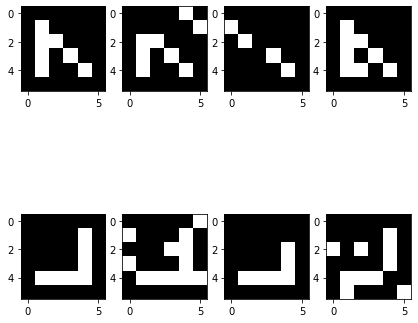

In [7]:
# 훈련 데이터 이미지
f,axes =plt.subplots(figsize=(7,7), nrows=2, ncols=4, sharey=True, sharex=True)
for ii in range(8):
    plt.subplot(2,4,ii+1); 
    if ii<4: 
         if ii==0: plt.imshow(A,cmap='gray', interpolation='none')
         else: plt.imshow(trainX[ii,:].reshape(6,6),cmap='gray', interpolation='none')
    else: 
        if ii==4: plt.imshow(B,cmap='gray', interpolation='none')
        else: plt.imshow(trainX[ii+5,:].reshape(6,6),cmap='gray', interpolation='none')

In [8]:
learning_rate=0.01; epochs=20
#X=tf.placeholder(tf.float32,[None,36])
#X_img=tf.reshape(X,[-1,6,6,1]) 
#Y=tf.placeholder(tf.float32,[None,2])
trainX = trainX.reshape([-1,6,6,1])

In [15]:
print(trainX.shape)

(20, 6, 6, 1)


In [9]:
# 합성곱에 사용하는 필터 크기와 개수, 보폭 지정
#K1=tf.Variable(tf.random_normal([4,4,1,4],stddev=0.01))
#a1=tf.nn.conv2d(X_img, K1, strides=[1,1,1,1], padding='VALID')
# 활성화함수 지정 
#a1=tf.nn.relu(a1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(5,5), strides=1, input_shape=(6,6,1), padding='valid', activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# 배치정규화 
#a1=tf.layers.batch_normalization(a1, training=True)
model.add(tf.keras.layers.BatchNormalization())

In [11]:
# 풀링의 종류와 크기, 보폭 지정 
#h1=tf.nn.max_pool(a1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

In [12]:
# 합성층의 마지막 부분을 1D로 변환
#Flat=tf.reshape(h1,[-1,np.prod(h1.get_shape().as_list()[1:4])])
model.add(tf.keras.layers.Flatten())

In [13]:
# 완전 연결 신경망의 은닉층의 구조 지정
#W1=tf.get_variable("W1",shape=[np.prod(h1.get_shape().as_list()[1:4]),10],initializer=tf.contrib.layers.xavier_initializer())
#b1=tf.Variable(tf.random_normal([10]))
#L1=tf.matmul(Flat, W1)+b1
# 최종 출력을 위해 소프트맥스함수 지정
#pred =linear(L1, 2, activation=tf.nn.softmax)
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 4)           104       
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 4)           16        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
Total params: 130
Trainable params: 122
Non-trainable params: 8
_________________________________________________________________


In [16]:
#cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
#optim=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#correct_predict=tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [19]:
model.fit(trainX, trainY, epochs=epochs)

Epoch 1/20
20/20 [==============================] - 4s 188ms/sample - loss: 0.2052 - acc: 0.9500
Epoch 2/20
20/20 [==============================] - 0s 987us/sample - loss: 0.1257 - acc: 1.0000
Epoch 3/20
20/20 [==============================] - 0s 399us/sample - loss: 0.0836 - acc: 1.0000
Epoch 4/20
20/20 [==============================] - 0s 250us/sample - loss: 0.0617 - acc: 1.0000
Epoch 5/20
20/20 [==============================] - 0s 150us/sample - loss: 0.0497 - acc: 1.0000
Epoch 6/20
20/20 [==============================] - 0s 201us/sample - loss: 0.0417 - acc: 1.0000
Epoch 7/20
20/20 [==============================] - 0s 150us/sample - loss: 0.0352 - acc: 1.0000
Epoch 8/20
20/20 [==============================] - 0s 209us/sample - loss: 0.0300 - acc: 1.0000
Epoch 9/20
20/20 [==============================] - 0s 100us/sample - loss: 0.0257 - acc: 1.0000
Epoch 10/20
20/20 [==============================] - 0s 149us/sample - loss: 0.0222 - acc: 1.0000
Epoch 11/20
20/20 [==========

In [23]:
np.argmax(model.predict(trainX), axis=1) == np.argmax(trainY, axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## 예제 5-2 MNIST 손글씨 숫자 분류

In [24]:
import numpy as np
import tensorflow as tf
#from libs.connections import linear 
import matplotlib.pyplot as plt

In [68]:
# 자료 입력
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [69]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


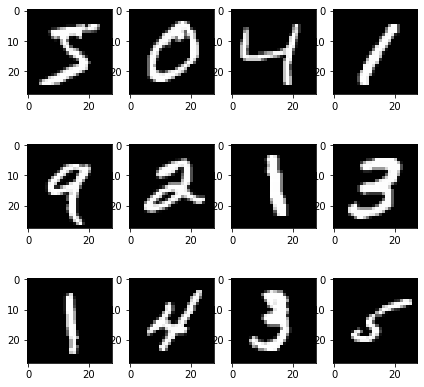

In [65]:
# 훈련 데이터 이미지
f,axes =plt.subplots(figsize=(7,7), nrows=3, ncols=4, sharey=True, sharex=True)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(X_train[ii].reshape(28,28),cmap='Greys_r')

In [104]:
learning_rate=0.001; epochs=10; batch_size=100
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [105]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [106]:
model = tf.keras.Sequential()
# 첫 번째 합성곱층에 사용하는 필터 크기와 개수, 보폭 지정
# 첫 번째 합성곱층의 활성화함수 지정 
model.add(tf.keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=1, input_shape=X_train.shape[1:], padding='valid', activation='relu'))
# 배치정규화 
model.add(tf.keras.layers.BatchNormalization())
# 첫 번째 풀링층에 사용하는 풀링의 종류와 크기, 보폭 지정
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))
# 두 번째 합성곱층에 사용하는 필터 크기와 개수, 보폭 지정
# 두 번째 합성곱층의 활성화함수 지정
model.add(tf.keras.layers.Conv2D(filters=50, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# 배치정규화 
model.add(tf.keras.layers.BatchNormalization())
# 두 번째 풀링층에 사용하는 풀링의 종류와 크기, 보폭 지정
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))
#두 번째 풀링층의 출력을 1D로 변환
model.add(tf.keras.layers.Flatten())
#완전 연결 신경망의 은닉층의 구조 지정
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [108]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [109]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.1282 - acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0395 - acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0266 - acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0201 - acc: 0.9934
Epoch 5/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0148 - acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0122 - acc: 0.9961
Epoch 7/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0102 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0109 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0078 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 10s 1

In [112]:
# 훈련 데이터의 예측 정확도
sum(np.argmax(model.predict(X_train), axis=1) == np.argmax(Y_train, axis=1)) / 60000

0.9960666666666667

In [114]:
# 검정 데이터의 예측 정확도
sum(np.argmax(model.predict(X_test), axis=1) == np.argmax(Y_test, axis=1)) / 10000

0.9874